# Imports

In [85]:
import pandas as pd
import numpy as np
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [46]:
df = pd.read_csv("ofertas_relampago.csv", encoding='latin-1')

In [47]:
df

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,15,9,16.28,6.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,lightning_deal,5,3,16.62,2.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS
48744,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,lightning_deal,5,1,38.79,4.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS


## Data Analysis

In [48]:
df.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,24579.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052
std,206.761058,195.813806,175.254414,45.475305
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.420000,3.000000
75%,15.000000,15.000000,30.925000,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


In [49]:
df.isna().sum()

OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64

## Feature Engineering

In [103]:
df['SOLD_AMOUNT'] = df['SOLD_AMOUNT'].fillna(0)
df['SOLD_QUANTITY'] = df['SOLD_QUANTITY'].fillna(0)

In [104]:
df['OFFER_START_DTTM'] = df['OFFER_START_DTTM'].astype('string')
df['OFFER_FINISH_DTTM'] = df['OFFER_FINISH_DTTM'].astype('string')

In [105]:
df['OFFER_START_DTTM'] = df['OFFER_START_DTTM'].str.replace('+00:00',' ')
df['OFFER_FINISH_DTTM'] = df['OFFER_FINISH_DTTM'].str.replace('+00:00',' ')

In [106]:
df['OFFER_START_DATE'] = pd.to_datetime(df['OFFER_START_DATE'])
df['OFFER_START_DTTM'] = pd.to_datetime(df['OFFER_START_DTTM'])
df['OFFER_FINISH_DTTM'] = pd.to_datetime(df['OFFER_FINISH_DTTM'])

In [107]:
df['OFFER_START_DTTM'] = df['OFFER_START_DTTM'] - timedelta(hours=6)
df['OFFER_FINISH_DTTM'] =df['OFFER_FINISH_DTTM'] - timedelta(hours=6)

In [108]:
df['OFFER_START_DATE_DAYWEEK'] = df['OFFER_START_DATE'].dt.dayofweek
df['OFFER_START_DATE_DAY'] = df['OFFER_START_DATE'].dt.day
df['OFFER_START_DATE_MONTH'] = df['OFFER_START_DATE'].dt.month
df['OFFER_START_DATE_YEAR'] = df['OFFER_START_DATE'].dt.year

In [109]:
df['OFFER_START_DTTM_DAYWEEK'] = df['OFFER_START_DTTM'].dt.dayofweek
df['OFFER_START_DTTM_DAY'] = df['OFFER_START_DTTM'].dt.day
df['OFFER_START_DTTM_MONTH'] = df['OFFER_START_DTTM'].dt.month
df['OFFER_START_DTTM_YEAR'] = df['OFFER_START_DTTM'].dt.year
df['OFFER_START_DTTM_HOUR'] = df['OFFER_START_DTTM'].dt.hour
df['OFFER_START_DTTM_MINUTE'] = df['OFFER_START_DTTM'].dt.minute

In [110]:
df['OFFER_FINISH_DTTM_DAYWEEK'] = df['OFFER_FINISH_DTTM'].dt.dayofweek
df['OFFER_FINISH_DTTM_DAY'] = df['OFFER_FINISH_DTTM'].dt.day
df['OFFER_FINISH_DTTM_MONTH'] = df['OFFER_FINISH_DTTM'].dt.month
df['OFFER_FINISH_DTTM_YEAR'] = df['OFFER_FINISH_DTTM'].dt.year
df['OFFER_FINISH_DTTM_HOUR'] = df['OFFER_FINISH_DTTM'].dt.hour
df['OFFER_FINISH_DTTM_MINUTE'] = df['OFFER_FINISH_DTTM'].dt.minute

In [111]:
df

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,...,OFFER_START_DTTM_MONTH,OFFER_START_DTTM_YEAR,OFFER_FINISH_DTTM_DAYWEEK,OFFER_FINISH_DTTM_DAY,OFFER_FINISH_DTTM_MONTH,OFFER_FINISH_DTTM_YEAR,OFFER_START_DTTM_HOUR,OFFER_START_DTTM_MINUTE,OFFER_FINISH_DTTM_HOUR,OFFER_FINISH_DTTM_MINUTE
0,2021-06-22,2021-06-22 04:00:00,2021-06-22 11:02:43,lightning_deal,4,-2,4.72,6.0,A,none,...,6,2021,1,22,6,2021,4,0,11,2
1,2021-06-22,2021-06-22 01:00:00,2021-06-22 07:00:02,lightning_deal,5,5,0.00,0.0,NaN,free_shipping,...,6,2021,1,22,6,2021,1,0,7,0
2,2021-06-22,2021-06-21 19:00:00,2021-06-22 01:00:01,lightning_deal,15,12,10.73,3.0,NaN,none,...,6,2021,1,22,6,2021,19,0,1,0
3,2021-06-22,2021-06-22 07:00:00,2021-06-22 13:36:12,lightning_deal,15,13,7.03,2.0,NaN,none,...,6,2021,1,22,6,2021,7,0,13,36
4,2021-06-22,2021-06-22 01:00:00,2021-06-22 03:48:12,lightning_deal,15,0,39.65,15.0,NaN,none,...,6,2021,1,22,6,2021,1,0,3,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 01:00:00,2021-06-19 07:00:01,lightning_deal,15,9,16.28,6.0,NaN,none,...,6,2021,5,19,6,2021,1,0,7,0
48742,2021-06-19,2021-06-19 01:00:00,2021-06-19 07:00:01,lightning_deal,5,5,0.00,0.0,NaN,free_shipping,...,6,2021,5,19,6,2021,1,0,7,0
48743,2021-06-19,2021-06-18 19:00:00,2021-06-19 01:00:03,lightning_deal,5,3,16.62,2.0,NaN,free_shipping,...,6,2021,5,19,6,2021,19,0,1,0
48744,2021-06-19,2021-06-19 01:00:00,2021-06-19 07:00:00,lightning_deal,5,1,38.79,4.0,NaN,free_shipping,...,6,2021,5,19,6,2021,1,0,7,0


In [81]:
df.describe()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,OFFER_START_DATE_DAYWEEK,OFFER_START_DATE_DAY,OFFER_START_DATE_MONTH,...,OFFER_START_DTTM_MONTH,OFFER_START_DTTM_YEAR,OFFER_FINISH_DTTM_DAYWEEK,OFFER_FINISH_DTTM_DAY,OFFER_FINISH_DTTM_MONTH,OFFER_FINISH_DTTM_YEAR,OFFER_START_DTTM_HOUR,OFFER_START_DTTM_MINUTE,OFFER_FINISH_DTTM_HOUR,OFFER_FINISH_DTTM_MINUTE
count,48746,48746,48746,48746.000000,48746.000000,24579.000000,24579.000000,48746.000000,48746.000000,48746.000000,...,48746.000000,48746.0,48746.000000,48746.000000,48746.000000,48746.0,48746.000000,48746.0,48746.000000,48746.000000
mean,2021-07-05 11:24:49.008328704,2021-07-05 18:35:32.408813056,2021-07-06 00:18:02.448713984,35.007508,30.565216,51.208898,10.851052,3.000082,16.760185,6.623846,...,6.623846,2021.0,3.000349,16.760309,6.623846,2021.0,7.215156,0.0,12.830878,3.083432
min,2021-06-01 00:00:00,2021-06-01 01:00:00,2021-06-01 01:00:00,1.000000,-192.000000,0.280000,1.000000,0.000000,1.000000,6.000000,...,6.000000,2021.0,0.000000,1.000000,6.000000,2021.0,0.000000,0.0,0.000000,0.000000
25%,2021-06-22 00:00:00,2021-06-22 09:00:00,2021-06-22 15:22:13,5.000000,4.000000,5.730000,1.000000,1.000000,9.000000,6.000000,...,6.000000,2021.0,1.000000,9.000000,6.000000,2021.0,1.000000,0.0,7.000000,0.000000
50%,2021-07-07 00:00:00,2021-07-07 12:00:00,2021-07-07 18:00:00,10.000000,8.000000,12.420000,3.000000,3.000000,17.000000,7.000000,...,7.000000,2021.0,3.000000,17.000000,7.000000,2021.0,7.000000,0.0,13.000000,0.000000
75%,2021-07-21 00:00:00,2021-07-21 06:00:00,2021-07-21 09:03:39.750000128,15.000000,15.000000,30.925000,6.000000,5.000000,25.000000,7.000000,...,7.000000,2021.0,5.000000,25.000000,7.000000,2021.0,13.000000,0.0,18.000000,0.000000
max,2021-07-31 00:00:00,2021-07-31 13:00:00,2021-07-31 21:00:00,9000.000000,8635.000000,4836.570000,1646.000000,6.000000,31.000000,7.000000,...,7.000000,2021.0,6.000000,31.000000,7.000000,2021.0,23.000000,0.0,23.000000,59.000000
std,NaN,NaN,NaN,206.761058,195.813806,175.254414,45.475305,1.937965,8.988789,0.484424,...,0.484424,0.0,1.937864,8.988770,0.484424,0.0,4.513768,0.0,4.906377,10.642068


In [82]:
df.dtypes

OFFER_START_DATE             datetime64[ns]
OFFER_START_DTTM             datetime64[ns]
OFFER_FINISH_DTTM            datetime64[ns]
OFFER_TYPE                           object
INVOLVED_STOCK                        int64
REMAINING_STOCK_AFTER_END             int64
SOLD_AMOUNT                         float64
SOLD_QUANTITY                       float64
ORIGIN                               object
SHIPPING_PAYMENT_TYPE                object
DOM_DOMAIN_AGG1                      object
VERTICAL                             object
DOMAIN_ID                            object
OFFER_START_DATE_DAYWEEK              int32
OFFER_START_DATE_DAY                  int32
OFFER_START_DATE_MONTH                int32
OFFER_START_DATE_YEAR                 int32
OFFER_START_DTTM_DAYWEEK              int32
OFFER_START_DTTM_DAY                  int32
OFFER_START_DTTM_MONTH                int32
OFFER_START_DTTM_YEAR                 int32
OFFER_FINISH_DTTM_DAYWEEK             int32
OFFER_FINISH_DTTM_DAY           

In [83]:
df.columns

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID', 'OFFER_START_DATE_DAYWEEK',
       'OFFER_START_DATE_DAY', 'OFFER_START_DATE_MONTH',
       'OFFER_START_DATE_YEAR', 'OFFER_START_DTTM_DAYWEEK',
       'OFFER_START_DTTM_DAY', 'OFFER_START_DTTM_MONTH',
       'OFFER_START_DTTM_YEAR', 'OFFER_FINISH_DTTM_DAYWEEK',
       'OFFER_FINISH_DTTM_DAY', 'OFFER_FINISH_DTTM_MONTH',
       'OFFER_FINISH_DTTM_YEAR', 'OFFER_START_DTTM_HOUR',
       'OFFER_START_DTTM_MINUTE', 'OFFER_FINISH_DTTM_HOUR',
       'OFFER_FINISH_DTTM_MINUTE'],
      dtype='object')

# Charts and Analysis

In [95]:
x = ['OFFER_TYPE','ORIGIN', 'SHIPPING_PAYMENT_TYPE','DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID']
for i in x:
    print(i,'\n')
    print(df[i].drop_duplicates())
    print('\n')

OFFER_TYPE 

0    lightning_deal
Name: OFFER_TYPE, dtype: object


ORIGIN 

0      A
1    NaN
Name: ORIGIN, dtype: object


SHIPPING_PAYMENT_TYPE 

0             none
1    free_shipping
Name: SHIPPING_PAYMENT_TYPE, dtype: object


DOM_DOMAIN_AGG1 

0                           PETS FOOD
1                        PET PRODUCTS
2                           COMPUTERS
9                         ELECTRONICS
16                            APPAREL
18                              PARTY
19                     TOYS AND GAMES
20                      PERSONAL CARE
23                           INDUSTRY
25             TOOLS AND CONSTRUCTION
28                         HOME&DECOR
38                             SPORTS
67       BOOKS, MULTIMEDIA & OTHER E!
112                         AUTOPARTS
135                            DRINKS
136                          FOOTWEAR
174                    WHEELS & TIRES
175                  BEAUTY EQUIPMENT
179                            MOBILE
180                APPAREL AC

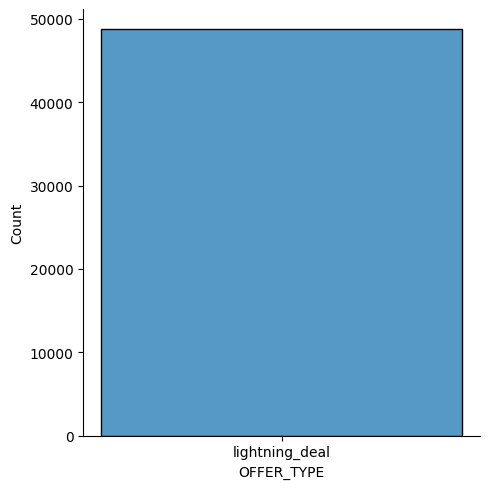

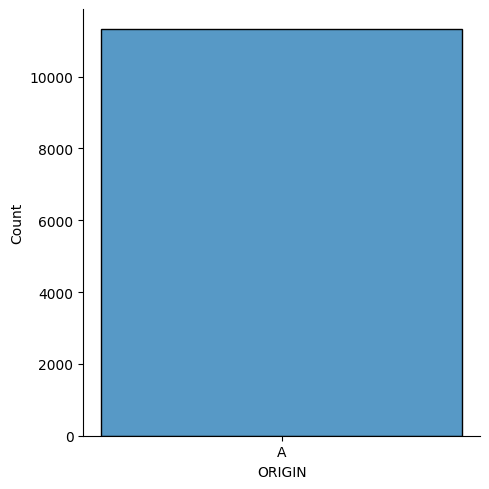

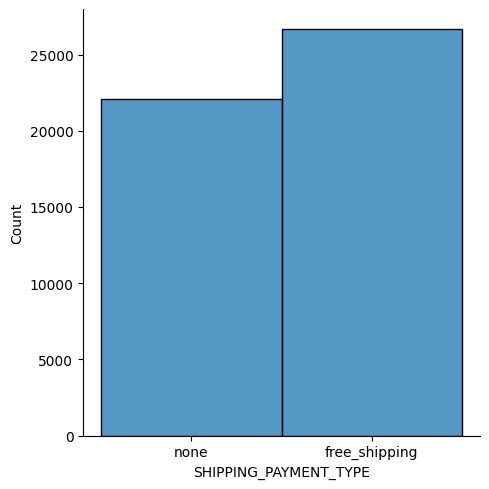

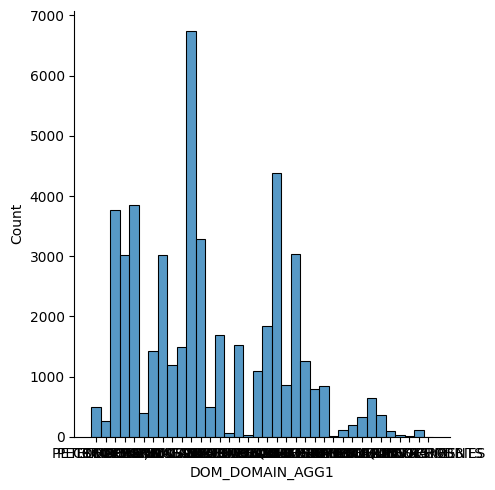

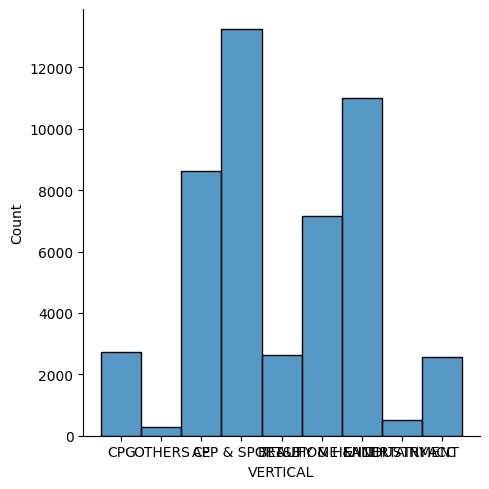

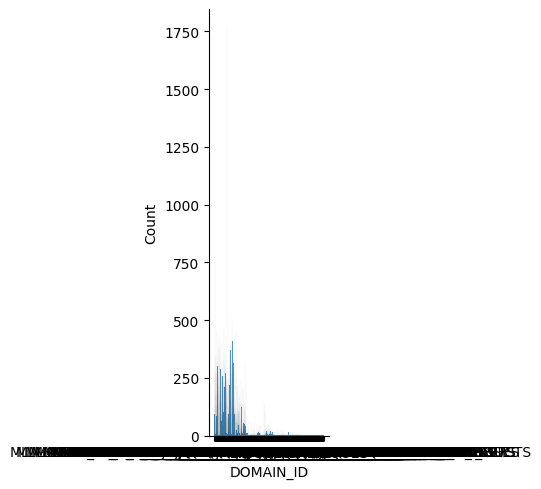

In [86]:
x = ['OFFER_TYPE','ORIGIN', 'SHIPPING_PAYMENT_TYPE','DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID']
for i in x:
    sns.displot(df, x=i)

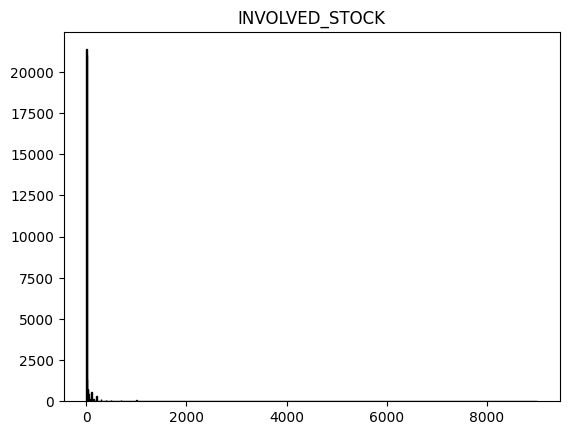

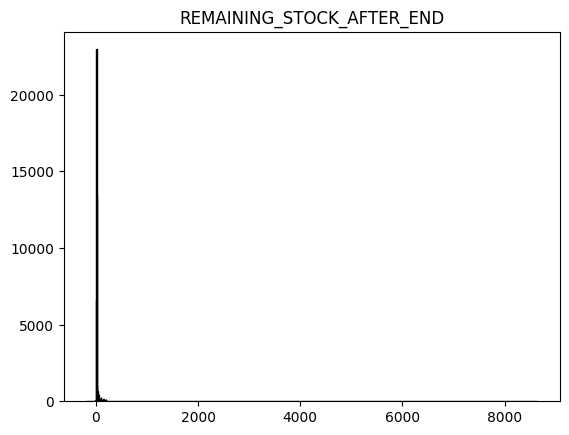

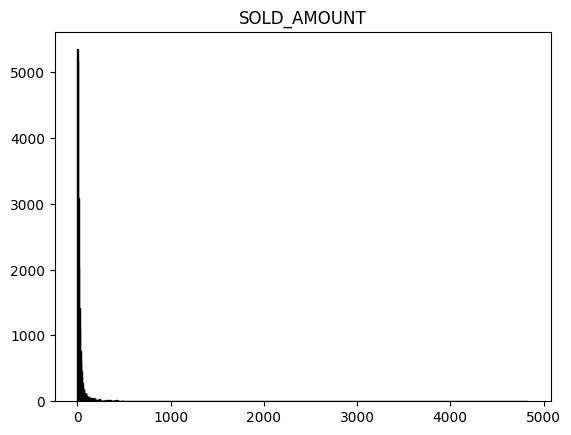

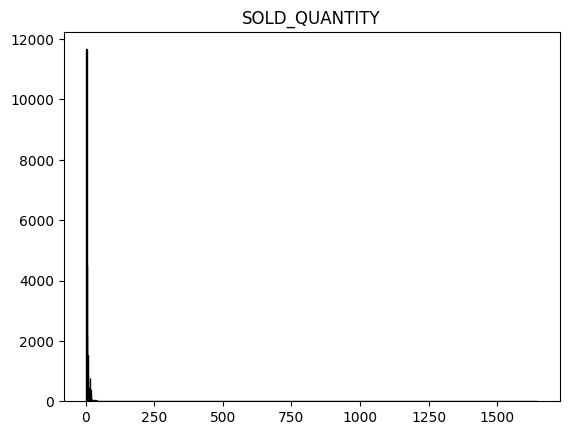

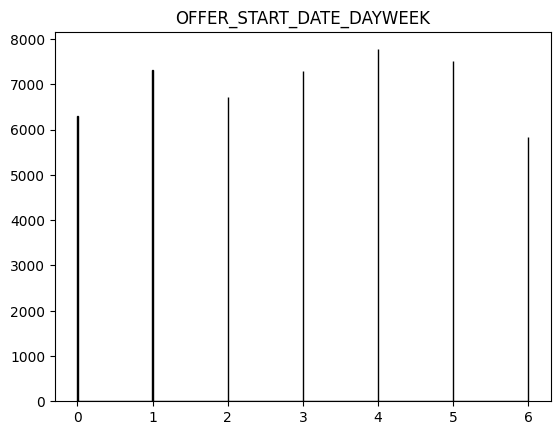

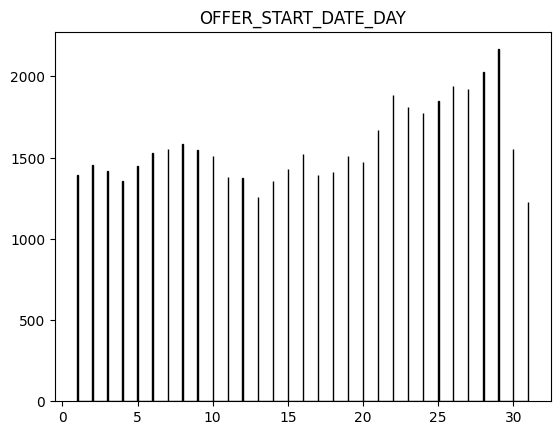

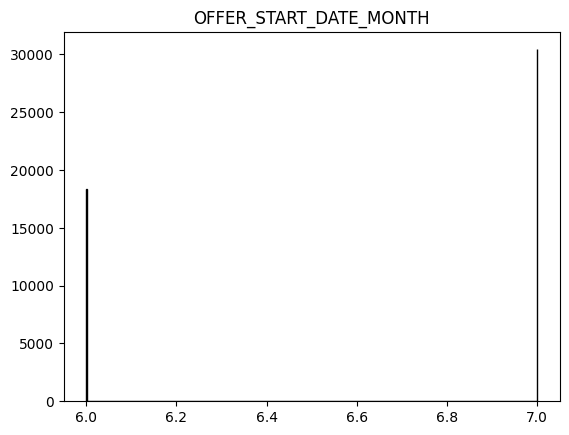

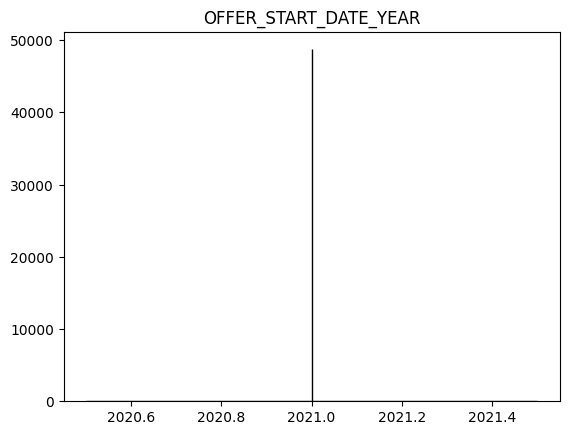

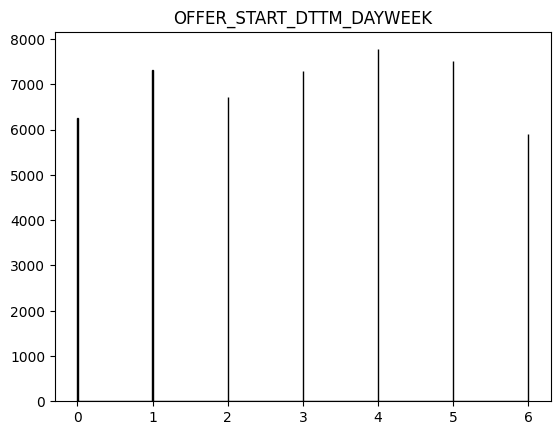

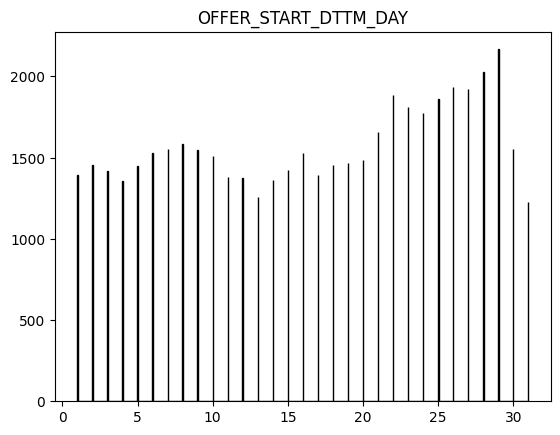

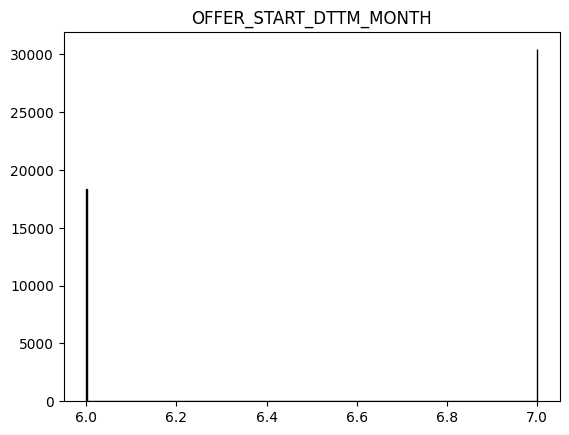

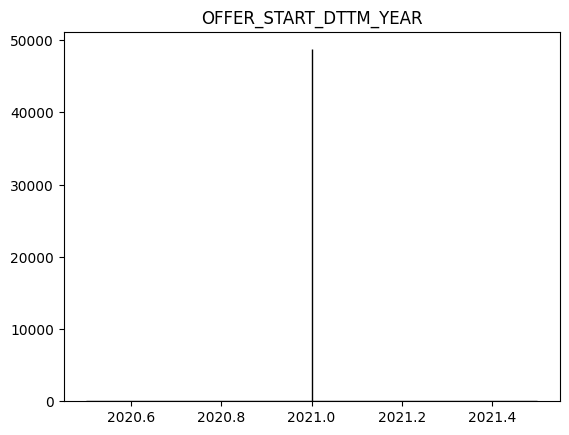

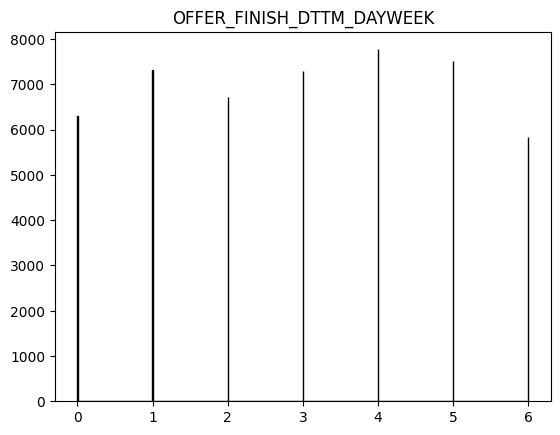

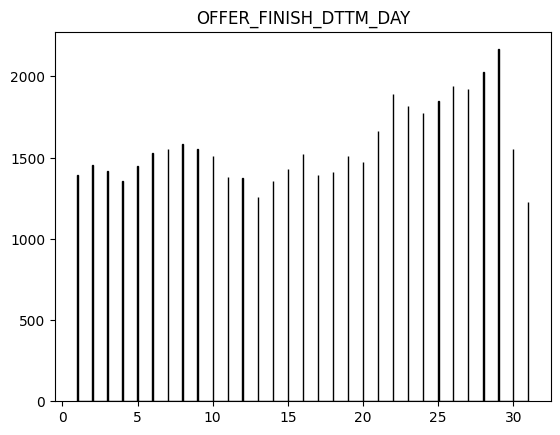

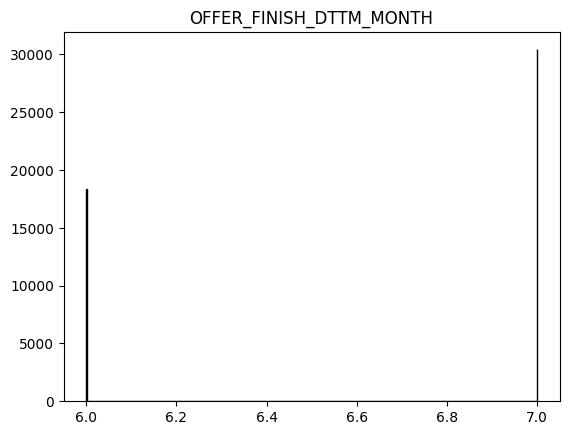

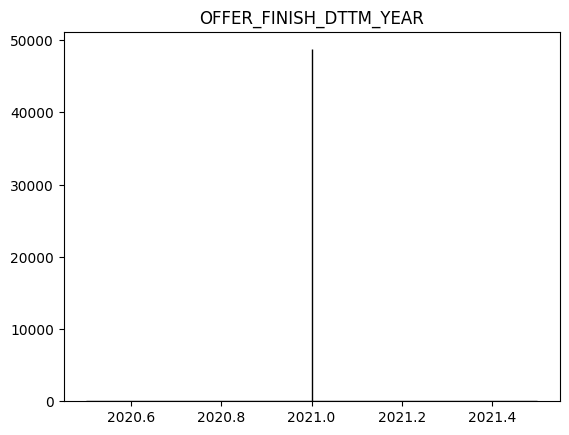

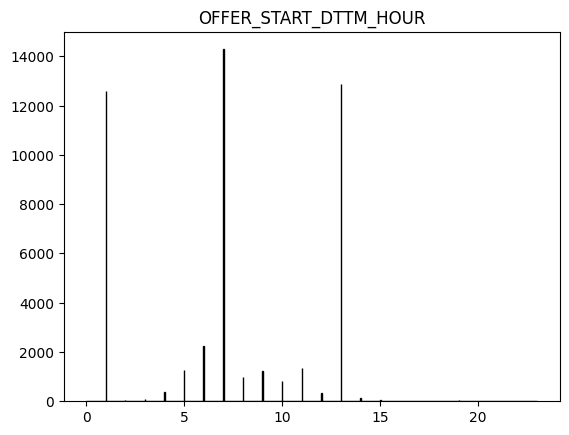

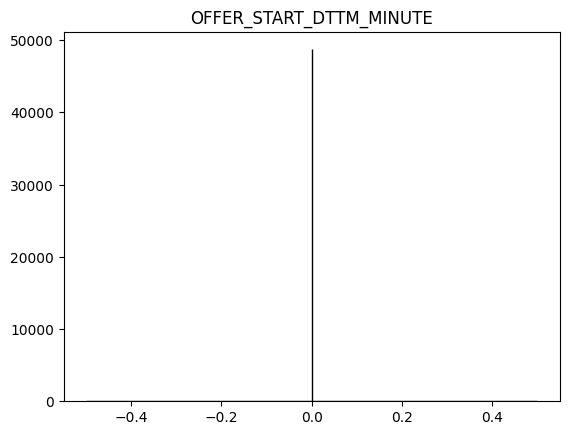

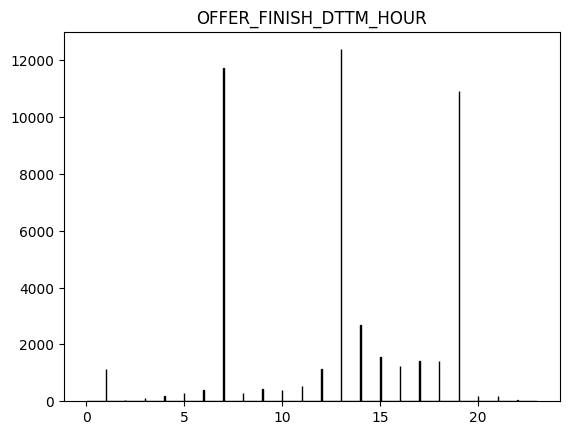

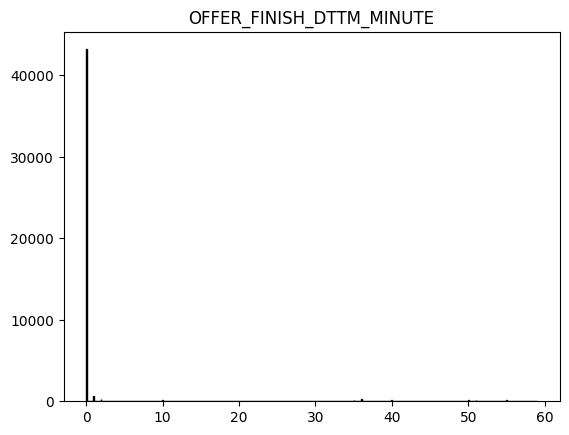

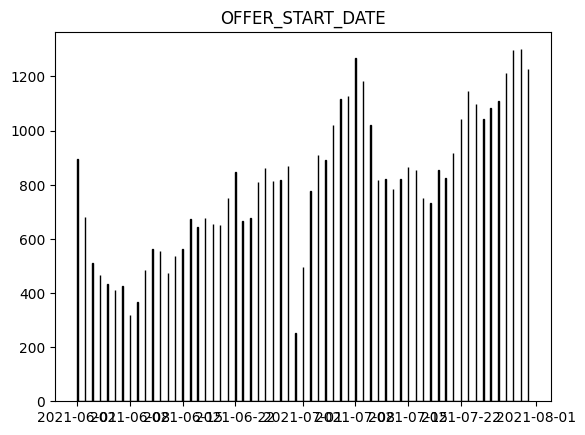

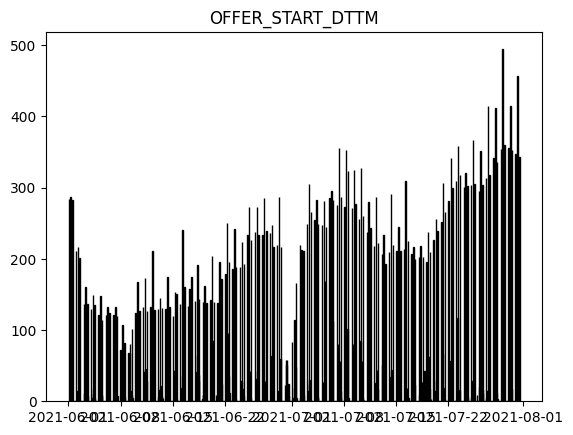

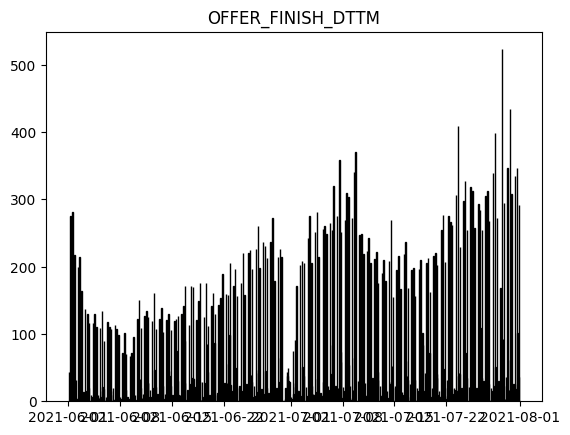

In [98]:
x = ['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY','OFFER_START_DATE_DAYWEEK',
       'OFFER_START_DATE_DAY', 'OFFER_START_DATE_MONTH',
       'OFFER_START_DATE_YEAR', 'OFFER_START_DTTM_DAYWEEK',
       'OFFER_START_DTTM_DAY', 'OFFER_START_DTTM_MONTH',
       'OFFER_START_DTTM_YEAR', 'OFFER_FINISH_DTTM_DAYWEEK',
       'OFFER_FINISH_DTTM_DAY', 'OFFER_FINISH_DTTM_MONTH',
       'OFFER_FINISH_DTTM_YEAR', 'OFFER_START_DTTM_HOUR',
       'OFFER_START_DTTM_MINUTE', 'OFFER_FINISH_DTTM_HOUR',
       'OFFER_FINISH_DTTM_MINUTE','OFFER_START_DATE','OFFER_START_DTTM','OFFER_FINISH_DTTM' ]
for i in x:
    plt.title(i)
    plt.hist(df[i], color = 'blue', edgecolor = 'black',bins = 1000)
    plt.show()

In [112]:
df.groupby('SOLD_AMOUNT')['SOLD_AMOUNT'].count().sort_values(ascending=False).head(30)

SOLD_AMOUNT
0.00     24167
4.25        39
2.89        31
5.71        30
2.55        29
5.75        29
5.68        29
8.54        28
3.85        28
2.68        28
4.48        27
2.54        27
2.82        27
3.82        27
3.83        26
2.39        25
5.11        25
2.41        24
2.61        24
2.85        24
2.25        24
8.36        24
11.39       24
3.90        23
2.69        23
3.19        23
4.24        23
4.49        23
2.24        23
3.96        22
Name: SOLD_AMOUNT, dtype: int64

In [113]:
df.groupby('SOLD_QUANTITY')['SOLD_QUANTITY'].count().sort_values(ascending=False)

SOLD_QUANTITY
0.0       24167
1.0        7450
2.0        4209
3.0        2547
5.0        2146
          ...  
281.0         1
283.0         1
284.0         1
289.0         1
1646.0        1
Name: SOLD_QUANTITY, Length: 374, dtype: int64

In [118]:
df[df['SOLD_QUANTITY'] == 0].groupby('DOM_DOMAIN_AGG1')['SOLD_QUANTITY'].count().sort_values(ascending=False)

DOM_DOMAIN_AGG1
HOME&DECOR                      3332
APPAREL ACCESORIES              2280
APPAREL                         1871
COMPUTERS                       1652
ELECTRONICS                     1649
SPORTS                          1589
PERSONAL CARE                   1483
TOYS AND GAMES                   975
PHARMACEUTICS                    831
TOOLS AND CONSTRUCTION           810
MOBILE                           799
AUTOPARTS                        794
FOOTWEAR                         775
STATIONARY                       683
INDUSTRY                         678
BABY                             627
FOODS                            516
PERSONAL HYGIENE                 489
BEAUTY EQUIPMENT                 408
MOTOPARTS                        356
BOOKS, MULTIMEDIA & OTHER E!     327
PARTY                            241
PETS FOOD                        232
CLEANING                         181
PET PRODUCTS                     149
SECURITY                         129
SUPLEMENTS            

In [121]:
df[df['SOLD_QUANTITY'] != 0].groupby('DOM_DOMAIN_AGG1')['SOLD_QUANTITY'].count().sort_values(ascending=False)

DOM_DOMAIN_AGG1
HOME&DECOR                      3410
PHARMACEUTICS                   2204
COMPUTERS                       2118
APPAREL ACCESORIES              2107
APPAREL                         1985
SPORTS                          1700
PERSONAL CARE                   1533
ELECTRONICS                     1369
MOBILE                          1042
AUTOPARTS                        902
FOOTWEAR                         741
BEAUTY EQUIPMENT                 691
TOOLS AND CONSTRUCTION           681
STATIONARY                       576
INDUSTRY                         521
TOYS AND GAMES                   451
PERSONAL HYGIENE                 351
FOODS                            342
MOTOPARTS                        285
PETS FOOD                        255
SECURITY                         191
CLEANING                         179
BABY                             174
BOOKS, MULTIMEDIA & OTHER E!     171
PARTY                            156
SUPLEMENTS                       116
PET PRODUCTS          

In [122]:
df.groupby('DOM_DOMAIN_AGG1')['SOLD_QUANTITY'].count().sort_values(ascending=False)

DOM_DOMAIN_AGG1
HOME&DECOR                      6742
APPAREL ACCESORIES              4387
APPAREL                         3856
COMPUTERS                       3770
SPORTS                          3289
PHARMACEUTICS                   3035
ELECTRONICS                     3018
PERSONAL CARE                   3016
MOBILE                          1841
AUTOPARTS                       1696
FOOTWEAR                        1516
TOOLS AND CONSTRUCTION          1491
TOYS AND GAMES                  1426
STATIONARY                      1259
INDUSTRY                        1199
BEAUTY EQUIPMENT                1099
FOODS                            858
PERSONAL HYGIENE                 840
BABY                             801
MOTOPARTS                        641
BOOKS, MULTIMEDIA & OTHER E!     498
PETS FOOD                        487
PARTY                            397
CLEANING                         360
SECURITY                         320
PET PRODUCTS                     257
SUPLEMENTS            

In [126]:
dfx = (df[df['SOLD_QUANTITY'] != 0].groupby('DOM_DOMAIN_AGG1')['SOLD_QUANTITY'].count() * 100) / df.groupby('DOM_DOMAIN_AGG1')['SOLD_QUANTITY'].count().sort_values(ascending=False)
dfx.sort_values(ascending=False)

DOM_DOMAIN_AGG1
PHARMACEUTICS                   72.619440
BEAUTY EQUIPMENT                62.875341
SUPLEMENTS                      60.103627
ANTIQUES & HOBBIES              60.000000
SECURITY                        59.687500
ACC TOOLS                       58.947368
MOBILE                          56.599674
COMPUTERS                       56.180371
VEHICULAR MULTIMEDIA            53.846154
AUTOPARTS                       53.183962
PETS FOOD                       52.361396
SPORTS                          51.687443
APPAREL                         51.478216
PERSONAL CARE                   50.828912
HOME&DECOR                      50.578463
CLEANING                        49.722222
FOOTWEAR                        48.878628
BATTERIES                       48.571429
APPAREL ACCESORIES              48.028265
OTHER                           47.058824
STATIONARY                      45.750596
TOOLS AND CONSTRUCTION          45.674044
ELECTRONICS                     45.361166
DRINKS            